# DLCV Assignment 1

**Due Date: 17/02/2023 11:59PM IST**

**Name:*Harsh Vishwakarma*

**Sr. No.:*21532*


In this assignment, we will cover the following topics:

1) Training a simple Linear Model 

2) Implementing Modules with Backprop functionality

3) Implementing Convolution Module on Numpy


It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like caffe,pytorch etc), which directly give functions for these steps, are to be used. 

# Training a simple Linear Model

In this section, you will write the code to train a Linear Model. The goal is to classify an input $X_i$ of size $n$ into one of $m$ classes. For this, you need to consider the following:

1)  **Weight Matrix** $W_{n\times m}$: The Weights are multipled with the input $X_i$ (vector of size $n$), to find $m$ scores $S_m$ for the $m$ classes.

2)  **The Loss function**:   
  * The Cross Entropy Loss: By interpreting the scores as unnormalized log probabilities for each class, this loss tries to measure dissatisfaction with the scores in terms of the log probability of the right class:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where $f_{ y_i }$ is the $y_i$-th element of the output of $W^T  X_i$

3) **A Regularization term**: In addition to the loss, you need a Regularization term to lead to a more distributed (in case of $L_2$) or sparse (in case of $L_1$) learning of the weights. For example, with $L_2$ regularization, the loss has the following additional term:

$$
R(W) = \sum_k\sum_l W_{k,l}^2  
$$

Thus the total loss has the form:
$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$

4) **An Optimization Procedure**: This refers to the process which tweaks the weight Matrix $W_{n\times m}$ to reduce the loss function $L$. In our case, this refers to Mini-batch Gradient Descent algorithm. We adjust the weights $W_{n\times m}$, based on the gradient of the loss $L$ w.r.t. $W_{n\times m}$. This leads to:
$$
W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W},
$$
where $\alpha$ is the learning rate. Additionally, with "mini-batch" gradient descent, instead of finding loss over the whole dataset, we use a small sample $B$ of the training data to make each learning step. Hence,
$$
W_{t+1} = W_{t} - \alpha \frac{\partial \sum_{i \in B}{L_{x_i}}}{\partial W},
$$
where $|B|$ is the batch size.

# Question 1

Train a **Single-Layer Classifier** for the MNIST dataset. 
* Use Softmax-Loss.
* Maintain a train-validation split of the original training set for finding the right value of $\lambda$ for the regularization, and to check for over-fitting.
* Finally, evaluate the classification performance on the test-set.


In [264]:
import sklearn as sk
import matplotlib.pyplot as plt
import struct as struct
import numpy as np
import pandas as pd
import math

from sklearn.datasets import load_digits
from sklearn.linear_model import RidgeClassifier


############### Training Samples and Labels ###############


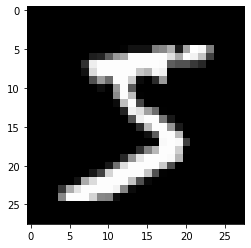

5
(60000, 28, 28)
(60000,)
############### Testing Samples and Labels ###############


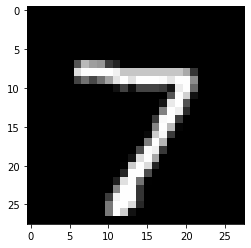

7
(10000, 28, 28)
(10000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [265]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.


####### train_images and labels #############
with open('MNIST/train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_imgs = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_imgs = train_imgs.reshape((size, nrows, ncols))
    
print("############### Training Samples and Labels ###############")
plt.imshow(train_imgs[0,:,:], cmap='gray')
plt.show()


with open('MNIST/train-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_labels = train_labels.reshape((size,)) # (Optional)
print(train_labels[0])
print(train_imgs.shape)
print(train_labels.shape)


####### test_images and labels #############

with open('MNIST/t10k-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_imgs = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_imgs = test_imgs.reshape((size, nrows, ncols))
    
print("############### Testing Samples and Labels ###############")
plt.imshow(test_imgs[0,:,:], cmap='gray')
plt.show()


with open('MNIST/t10k-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_labels = test_labels.reshape((size,)) # (Optional)
print(test_labels[0])
print(test_imgs.shape)
print(test_labels.shape)


classes= set(test_labels)
print(classes)

In [266]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.

# maintain a train-val split

# Now, write a generator that yields (random) mini-batches of the input data
# Do not use same set of mini-batches for different epochs
    
def get_minibatch(training_x, training_y,kappa):
    indices = np.arange(len(training_x))
    np.random.shuffle(indices)
    
    for i in range(0, len(training_x),kappa):
        mini_x = training_x[indices[i:i+kappa]]
        mini_y = training_y[indices[i:i+kappa]]
        yield mini_x, mini_y
    
    
    ## Read about Python generators if required.

    ## WRITE CODE HERE
 


In [267]:
# Define the class for a Single Layer Classifier
class Single_layer_classifier():
    
    def __init__(self, input_size, output_size,lambd):
        self.weights = np.random.normal(loc=0,scale=0.001 ,size= (input_size,output_size))
        self.input_size = input_size
        self.output_size = output_size
        self.lambd = lambd
        self.eta = 0.0001
        # self.bias = 
        ## WRITE CODE HERE
        
        # Give the instance a weight matrix, initialized randomly
        # One possible strategy for a good initialization is Normal (0, σ) where σ = 1e-3.
        # Try experimenting with different values of σ.
        
    # Define the forward function
    def forward(self, input_x):
        
        input_x = input_x.reshape(input_x.shape[0],1) #make input_x 784 X 1
        #print(input_x.shape,self.weights.shape)
        scores = np.matmul(self.weights.T,input_x)
        mi=1000000000
        ma = -1000000
        
        ######## Normalize scores ###########
        for i in range(0,len(scores)):
            for j in range(0,len(scores[0])):
                mi = min(mi,scores[i][j])
                ma = max(ma,scores[i][j])
        for i in range(0,len(scores)):
            for j in range(0,len(scores[0])):
                scores[i][j] = scores[i][j]-mi/(ma-mi)
        
        
        return scores
    
    # Similarly a backward function
    # we define 2 backward functions (as Loss = L_data + L_reg, grad(Loss) = grad(L1) + grad(L2))
    
    def backward_Ldata(self, grad_from_loss,x_i):
        #print(grad_from_loss.shape,x_i.shape)
        x_i = x_i.reshape(x_i.shape[0],-1)
        
        grad_matrix = np.matmul(grad_from_loss,x_i.T)
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the loss w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        
        return grad_matrix.T
        
    def backward_Lreg(self):
        grad_matrix= 2*self.weights
    
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the regularization-term
        # w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        
        return grad_matrix
    ##### Update weights in backward pass ######
    def backward(self,grad_matrix):
        self.weights = self.weights - self.eta*(grad_matrix+self.lambd*self.backward_Lreg())


In [287]:
# Implement the Softmax loss function
def loss_function(input_y,scores):
   
 
    x=-1*sum(scores*input_y)
    
    loss = x + math.log(sum(np.exp(scores))+0.0001)
    
    return loss


def loss_backward(scores,input_y):
    grad_part = np.exp(scores)/sum(np.exp(scores))
    grad_part = grad_part.reshape(grad_part.shape[0],1)
    grad_from_loss = np.subtract(grad_part,input_y)
    
    return grad_from_loss



In [269]:
# WRITE CODE HERE
def get_onehotencoding(input_y):
    encoded_y = np.zeros(shape=(10,1))
    encoded_y[input_y]=1.0
            
    return encoded_y
    

In [283]:
# Finally the trainer:
# Make an instance of Single_layer_classifier
# Train for t epochs:
###  Train on the train-set obtained from train-validation split
###  Use the mini-batch generator to get each mini-batch

kappa = 120

model = Single_layer_classifier(784,10,0.001)
loss_per_minibatch = []
minibatch = get_minibatch(train_imgs,train_labels,kappa)

epochs = 10
for e in range(epochs):
    for iter_num,(input_x , input_y) in enumerate(minibatch):
        input_x = input_x.reshape(input_x.shape[0],-1)
        loss_per_epoc=[]
        emp_error=[]
        #Forward Pass

        for i in range(kappa):

            scores = model.forward(input_x[i])
            onehot_vector = get_onehotencoding(input_y[i]);
            loss_per_epoc.append(loss_function(onehot_vector,scores))
            grad_for_loss = loss_backward(scores,onehot_vector)
            emp_error.append(model.backward_Ldata(grad_for_loss,input_x[i]))

     

        loss_per_minibatch.append(loss_per_epoc[-1])

        # Backward pass
        gradient_descent = np.array(sum(emp_error))/kappa
        model.backward(gradient_descent)


        # Update weights

        # Log the training loss value and training accuracy 


### Plot the training loss and training accuracy plot

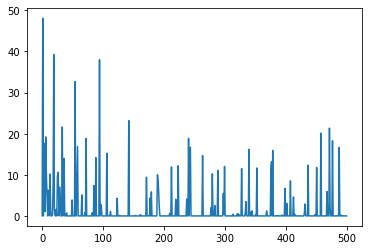

------train accuracy -------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6055
           1       0.96      0.94      0.95      6858
           2       0.77      0.97      0.86      4729
           3       0.87      0.89      0.88      5991
           4       0.91      0.90      0.91      5913
           5       0.71      0.93      0.81      4138
           6       0.97      0.87      0.92      6621
           7       0.94      0.91      0.92      6457
           8       0.93      0.70      0.80      7756
           9       0.85      0.92      0.88      5482

    accuracy                           0.89     60000
   macro avg       0.89      0.90      0.89     60000
weighted avg       0.90      0.89      0.89     60000



In [284]:
plt.plot(loss_per_minibatch)
plt.show()
print("------train accuracy -------------")
from sklearn.metrics import classification_report, confusion_matrix
y_pred =[]
for input_x in train_imgs:
    input_x = input_x.reshape(28*28,1)
    scores = model.forward(input_x)
    y_pred.append(np.argmax(scores))

print(classification_report(y_pred,train_labels))

### Find the accuracy on the validation set

In [285]:
#WRITE CODE
## validation set accuracy 
from sklearn.metrics import classification_report, confusion_matrix

def validate (train_imgs , train_labels):
    n = train_imgs.shape[0]
    validation_sets= n//5
    indices = np.arange(n)
    np.random.shuffle(indices)
    validation_indices = indices[:validation_sets]
    validation_train_imgs = train_imgs[validation_indices]
    validation_train_labels =train_labels[validation_indices]
    return validation_train_imgs,validation_train_labels
validation_train_imgs,validation_train_labels= validate(train_imgs , train_labels)
y_pred =[]
for input_x in vali_data:
    input_x = input_x.reshape(28*28,1)
    scores = model.forward(input_x)
    y_pred.append(np.argmax(scores))

print(classification_report(y_pred,vali_label))
print("#############NOTE############")
print("The accuracy is best for lambda 0.0001 i.e 89%")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1204
           1       0.94      0.94      0.94      1335
           2       0.77      0.97      0.86       942
           3       0.85      0.89      0.87      1163
           4       0.91      0.91      0.91      1205
           5       0.70      0.93      0.80       825
           6       0.98      0.87      0.92      1304
           7       0.95      0.91      0.93      1313
           8       0.94      0.68      0.79      1594
           9       0.85      0.92      0.89      1115

    accuracy                           0.89     12000
   macro avg       0.88      0.90      0.88     12000
weighted avg       0.90      0.89      0.89     12000

#############NOTE############
The accuracy is best for lambda 0.0001 i.e 89%


In [286]:
# WRITE CODE HERE
print("------test accuracy -------------")
y_test_pred =[]
for input_x in test_imgs:
    input_x = input_x.reshape(28*28,1)
    scores = model.forward(input_x)
    y_test_pred.append(np.argmax(scores))

print(classification_report(y_test_pred,test_labels))

------test accuracy -------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1022
           1       0.97      0.95      0.96      1152
           2       0.77      0.98      0.86       808
           3       0.89      0.89      0.89      1012
           4       0.92      0.90      0.91      1003
           5       0.73      0.94      0.82       689
           6       0.96      0.88      0.92      1052
           7       0.93      0.90      0.91      1059
           8       0.93      0.69      0.80      1314
           9       0.82      0.93      0.87       889

    accuracy                           0.89     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.90      0.89      0.89     10000



### Find the best performing class and the worst performing class


class 0, 1, 4, 6, and 9 have relatively high precision, recall, and f1-score values, suggesting that the model is performing well on these classes. On the other hand, class 7,8 has a relatively low precision score

# Training a Linear Classifier on MNIST from scikit-learn

In this section you have to train a linear classifier from the scikit-learn library and compare its results against your implementation.
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [173]:
# WRITE CODE HERE

%matplotlib inline


X=train_imgs.reshape(train_imgs.shape[0],-1)
y=train_labels

print(X.shape,y.shape)
clf = RidgeClassifier().fit(X, y)
print(clf.score(X, y))

clf.score(test_imgs.reshape(test_imgs.shape[0],-1), test_labels)


(60000, 784) (60000,)
0.8577333333333333


0.8603

### Compare the training and test accuracies for the your implementation and linear classifier from scikit-learn

In [ ]:
    # WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE

# Implementing Backpropagation

Now that you have had some experience with single layer networks, we can proceed to more complex architectures. But first we need to completely understand and implement backpropagation.

## Backpropagation:

Simply put, a way of computing gradients of expressions through repeated application of chain rule. If
$$
L = f (g (h (\textbf{x})))
$$
then, by the chain rule we have:
$$
\frac{\partial L}{\partial \textbf{x}} = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial \textbf{x}} 
$$

** Look into the class Lecture for more detail **



# Question 2 : Scalar Backpropagation

Evaluate the gradient of the following function w.r.t. the input:

$$ f(x,y,z) =  log(\sigma(\frac{cos(\pi \times x)+sin(\pi \times y/2)}{tanh(z^2)}))$$
where $\sigma$ is the sigmoid function. Find gradient for the following inputs:
  * $(x,y,z)$ =  (2,4,1)
  * $(x,y,z)$ =  (9,14,3)
  * $(x,y,z)$ =  (128,42,666)
  * $(x,y,z)$ =  (52,14,28)

      

In [ ]:
# To solve this problem, construct the computational graph
# Write a class with forward and backward functions, for each node if you like
# For eg:

        
class Sigmoid():
    def __init__(self):
        self.func = None
        self.input_v =None
        
    def forward(self,input_v):
        self.func = 1/(1+np.exp(-1*input_v))
        self.input_v = input_v
        return self.func
        # save values useful for backpropagation
    def backward(self):
        if self.func==None or self.input_v==None:
            return
        else:
            return self.func*(1-self.func)
        
class Log():
    def __init__(self):
        self.func = None
        self.input_v =None
    
    def forward(self,input_v):
        self.func = np.log(input_v)
        self.input_v = input_v
        
        return self.func
    
    def backward(self):
        
        if self.func==None or self.input_v==None:
            return
        else:
            return 1/self.input_v
        
class Tanh():
    def __init__(self):
        self.func = None
        self.input_v =None
        
    def forward(self,input_v):
        self.func= np.tanh(input_v)
        self.input_v = input_v
        return self.func
    
    def backward(self):
        if self.func== None or self.input_v==None:
            return 
        else:
            return (1-np.square(self.func))
    
class Cos():
    def __init__(self):
        self.func = None
        self.input_v =None
        
    def forward(self,input_v):
        self.func= np.cos(input_v)
        self.input_v = input_v
        return self.func
    
    def backward(self):
        if self.func==None or self.input_v==None:
            return 
        else:
            return -1*np.sin(self.input_v)
        
class Sin():
    def __init__(self):
        self.func=None
        self.input =None
    
    def forward(self,input_v):
        self.func = np.sin(input_v)
        
        self.input_v = input_v
        return self.func
    
    def backward(self):
        if self.func==None or self.input_v==None:
            return
        else:
            return np.cos(self.input_v)
# CAUTION: Carefully treat the input and output dimension variation. At worst, handle them with if statements.

In [ ]:
# Now write the class func
# which constructs the graph (all operators), forward and backward functions.

class Func():
    def __init__(self):
        # construct the graph here
        # assign the instances of function modules to self.var
        self.x=None
        self.y=None
        self.z=None
        self.n_1=None
        self.n_2=None
        self.n_3=None
        self.n_4=None
        self.n_5=None
        self.n_6=None
        self.n_7=None
        self.n_8=None
        self.n_9=None
        self.n_10=None
        self.tanh = Tanh()
        self.cos = Cos()
        self.sin = Sin()
        self.log = Log()
        self.sigmoid = Sigmoid()
        
    def forward(self,x,y,z):
        
        self.x ,self.y,self.z = x,y,z
        self.n_1 = math.pi*self.x
        self.n_2 = math.pi*self.y/2
        self.n_3 = np.square(self.z)
        self.n_4 = self.cos.forward(self.n_1)
        self.n_5 = self.sin.forward(self.n_2)
        self.n_6 = self.n_4 + self.n_5
        self.n_7 = self.tanh.forward(self.n_3)
        self.n_8 = np.divide(self.n_6,self.n_7)
        self.n_9 = self.sigmoid.forward(self.n_8)
        self.n_10 = self.log.forward(self.n_9)
        output = self.n_10
     
        # Using the graph element's forward functions, get the output. 
        
        return output
    
    def backward(self):
        # Use the saved outputs of each module, and backward() function calls
        
        grad_x,grad_y,grad_z =1,1,1
        out = self.log.backward()
#         print("log_backward", out)
        out = out*self.sigmoid.backward()
#         print(self.sigmoid.func)
#         print("sigmoid_inp",self.sigmoid.input_v)
#         print("sigmoid_backward",out)
        grad_xy  = out/(self.n_7) ## backward of divide
#         print("output_xy",self.n_6)
#         print("output_tanh",self.n_7)
#         print("grad_xy",grad_xy)
        grad_x = self.cos.backward()*grad_xy
#         print("cos_output",self.cos.func)
#         print("sin_output",self.sin.func)
#         print("grad_x",grad_x)
        grad_x = math.pi*(grad_x)
        grad_x =0 if (abs(grad_x))<10**(-5) else grad_x
        #print("grad")
        grad_y = self.sin.backward()*grad_xy
        #print("grad_y",grad_y)
        grad_y = math.pi*grad_y/2
        grad_y = 0 if abs(grad_y)<10**(-5) else grad_y
        
        grad_z = -out*self.n_6*(1/np.square(self.n_7)) ## (-x/y^2)*output
        #print("grad_z",grad_z)
        grad_z = grad_z*(self.tanh.backward())
        grad_z = 2*self.z*grad_z
        grad_z = 0 if abs(grad_z)<10**(-5) else grad_z
        return [grad_x,grad_y,grad_z]
    

f= Func()
x,y,z = 2.0,4.0,1.0
output = f.forward(x,y,z)
print(x,y,z , f.forward(x,y,z),f.backward())
x,y,z = 9.0,14.0,3.0
output = f.forward(x,y,z)
print(x,y,z , f.forward(x,y,z),f.backward())
x,y,z = 52.0,14.0,28.0
output = f.forward(x,y,z)
print(x,y,z , f.forward(x,y,z),f.backward())

2.0 4.0 1.0 -0.23823101469115085 [0, 0.43720979194276516, -0.3069722756588883]
9.0 14.0 3.0 -1.3132617097862371 [0, -1.1483441743695977, 0]
52.0 14.0 28.0 -0.31326168751822253 [0, -0.42245219681098645, 0]


## Compare Results with Pytorch


In [ ]:
import torch

def f(x, y, z):
    return torch.log(torch.sigmoid((torch.cos(torch.tensor(np.pi) * x) + torch.sin(torch.tensor(np.pi) * y / 2)) / torch.tanh(z ** 2)))
#x,y,z = 2.0,4.0,1.0
x,y,z = 9.0,14.0,3.0
#x,y,z = 52.0,14.0,28.0

x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)
z = torch.tensor(z, requires_grad=True)

out = f(x, y, z)
print(out)
out.backward()

dx = x.grad
dy = y.grad
dz = z.grad
print(dx,dy,dz)

tensor(-1.3133, grad_fn=<LogBackward0>)
tensor(1.6433e-07) tensor(-1.1483) tensor(5.2289e-07)


## Question 3 : Modular Vector Backpropagation

* Construct a Linear Layer module, implementing the forward and backward functions for arbitrary sizes.
* Construct a ReLU module, implementing the forward and backward functions for arbitrary sizes.
* Create a 2 layer MLP using the constructed modules.

* Modifying the functions built in Question 1 , train this two layer MLP for the same data set, MNIST, with the same train-val split.

In [254]:
# Class for Linear Layer (If you're stuck, you can refer to code of PyTorch/Tensorflow packages) 
class Linear_Layer:
    def __init__(self, input_size, output_size,batch_size,eta):
        self.input= None
        self.output= None
        self.eta = eta
        self.lmbd=0.0001
        self.batch_size = batch_size
        self.weights = np.random.rand(input_size, output_size)*0.001
        self.gradient_matrix = np.zeros(shape=(input_size,output_size))
    
    def forward(self, input_data):
        self.input = input_data.reshape(input_data.shape[0],1)
        self.output = np.dot( self.weights.T, self.input)
        return self.output
    
    def backward_ldata(self,grad_from_loss):
        propogated_grad = np.matmul( self.weights,grad_from_loss)
        self.gradient_matrix += np.dot(self.input, grad_from_loss.T)
        return propogated_grad  
        
        
    def backward(self):
        self.weights =self.weights- eta * (self.gradient_matrix+self.lmbd*2*self.weights)/self.batch_size
        self.gradient_matrix = np.zeros_like(self.weights) ##flush out gradient
        
    
 


In [255]:
# Class for ReLU
class ReLU () :
    def __init__(self):
        self.input_data = None
    def forward(self,inp):
        self.input_data = inp
        inp[inp<0] = 0
       
        return inp
    def backward_ldata(self,prev_grad):
        return prev_grad*(self.input_data > 0)
    
    def backward(self):
        return
    

In [256]:
# Your 2 layer MLP 
class MLP():
    def __init__(self):
        self.layers = []
        self.loss = []
    
    def add_layer(self,layer):
        self.layers.append(layer)
            
    def predict(self, input_data):
        samples = input_data.shape[0]
        result = []

        # run network over all samples
        
        for sample in input_data:
            # forward propagation
            
            scores = sample
            for layer in self.layers:
                scores = layer.forward(scores)
#                 print(output,end=' ')
                
            result.append(np.argmax(scores))
        return result
    
    def loss_function(input_y,scores):
        x=-1*sum(scores*input_y)
        loss = x + math.log(sum(np.exp(scores))+0.0001)
        return loss


    def loss_backward(scores,input_y):
        grad_part = np.exp(scores)/sum(np.exp(scores))
        grad_part = grad_part.reshape(grad_part.shape[0],1)
        grad_from_loss = np.subtract(grad_part,input_y)
        return grad_from_loss
    
    def train(self,X,y,epochs,batch_size,eta):
        batch_losses = []
        min_loss =10000 
        for epoch in range(epochs):
            minibatch = get_minibatch(X,y,batch_size)
            loss =0           
            for iter_num ,(input_x , input_y) in enumerate(minibatch):
                for i in range(batch_size):
                    input_x = input_x.reshape(input_x.shape[0],-1)
                    scores = input_x[i]
                    ####### forward ##########
                    for layer in self.layers:
                        scores = layer.forward(scores)
                    hot_encoded = get_onehotencoding(input_y[i])
                    loss += loss_function(scores,hot_encoded)
                    
                    grad_for_loss = loss_backward(scores,hot_encoded)
                    
                    ####### backward sample wise to calculate gradient_matrix #######
                    for layer in reversed(self.layers):
                        grad_for_loss = layer.backward_ldata(grad_for_loss)


            
                self.loss.append(loss/batch_size)

                min_loss = min(min_loss,self.loss[-1])
                
                ##### weights update for each layer using backward
                for layer in self.layers:
                    layer.backward()
                loss=0
            
        plt.plot(self.loss)


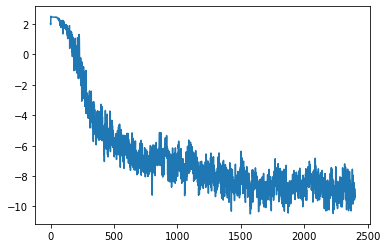

In [257]:
####### hyperparameters ########
epochs = 2
batch_size =50
output_size = 10
input_size = 784
eta = 0.01

# Train the MLP
mlp = MLP()

##### add layer #####
mlp.add_layer(Linear_Layer(input_size,512,batch_size,eta))
mlp.add_layer(ReLU())

mlp.add_layer(Linear_Layer(512,256,batch_size,eta))
mlp.add_layer(ReLU())
mlp.add_layer(Linear_Layer(256,10,batch_size,eta))



mlp.train(train_imgs,train_labels,epochs,batch_size,eta)

### Plot the training loss and training accuracy plot

In [211]:
from sklearn.metrics import classification_report, confusion_matrix



print("############ Training Accuracy Using MLP #################")
y_train_pred =mlp.predict(train_imgs.reshape(train_imgs.shape[0],-1))
print(classification_report(y_train_pred,train_labels))


print("############ Test Accuracy Using MLP #################")
y_test_pred = mlp.predict(test_imgs.reshape(test_imgs.shape[0],-1))
plt.figure(figsize=(10,12))
print(classification_report(y_test_pred,test_labels))



############ Training Accuracy Using MLP #################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5935
           1       0.99      0.99      0.99      6769
           2       0.98      0.98      0.98      5952
           3       0.96      0.98      0.97      6001
           4       0.99      0.89      0.94      6471
           5       0.95      0.99      0.97      5222
           6       0.95      0.99      0.97      5660
           7       0.98      0.97      0.98      6311
           8       0.98      0.94      0.96      6110
           9       0.91      0.98      0.94      5569

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

############ Test Accuracy Using MLP #################
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       995
           1      

<Figure size 720x864 with 0 Axes>

In [ ]:
### Find the accuracy on the validation set

In [ ]:
# WRITE CODE HERE

In [ ]:
# Find the optimal value of learning rate and batch size. 
# Use the same tuning strategy as the previous question
# Create plot and table to show the effect of the hparams.

In [ ]:
### Report final performance on MNIST test set

In [ ]:
# WRITE CODE HERE

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE


# Implementing a Convolution Module with Numpy

* This topic will require you to implement the Convolution operation using Numpy.
* We will use the Module for tasks like Blurring.
* Finally, we implement Backpropagation for the convolution module.


## Question 4

* Implement a naive Convolution module, with basic functionalities: kernel_size, padding, stride and dilation
  
* Test out the convolution layer by using it to do gaussian blurring on 10 random images of CIFAR-10 dataset


In [288]:
import numpy as np

class Convolution_Layer:
    
    def __init__(self, in_channels, out_channels, filter_size, bias=True, stride=1,eta=0.000001):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.filter_size = filter_size
        self.stride = stride
        self.eta = eta
        self.weights = np.random.rand(out_channels, filter_size[0], filter_size[1], in_channels)*0.001/np.sqrt(filter_size[0]**2*in_channels*out_channels)
        self.gradient_weights = np.zeros_like(self.weights)
        self.input_v = None
        self.output = None
        
    def forward(self, input_v):
        self.input_v =  input_v
        
        height, width, channels = self.input_v.shape
        output_height = (height - self.filter_size[0])//self.stride + 1
        output_width = (width - self.filter_size[1] )//self.stride + 1
        self.output = np.zeros((output_height, output_width, self.out_channels))
        
        for b in range(len(input_v)):
            for i in range(output_height):
                for j in range(output_width):
                    for k in range(0,self.out_channels):
                        h_start = i *self.stride
                        h_end = h_start + self.filter_size[0]
                        w_start = j *self.stride
                        w_end = w_start + self.filter_size[1]
                       
                        x = self.weights[k,:,:,:] * self.input_v[h_start:h_end, w_start:w_end, :self.in_channels]
                        #print("x=",x.shape)
                        self.output[i, j, k] = np.sum(x)
        return self.output
    
    def backward(self, output_gradient):
        output_height, output_width,_ = output_gradient.shape
        input_gradient = np.zeros_like(self.input_v,dtype='float64')
        batch_size = len(self.input_v)
        #print(output_gradient)
        for b in range(batch_size):
            for i in range(output_height):
                for j in range(output_width):
                    for k in range(self.out_channels):
                        h_start = i * self.stride
                        h_end = h_start + self.filter_size[0]
                        w_start = j * self.stride
                        w_end = w_start + self.filter_size[1]
                        input_gradient[h_start:h_end, w_start:w_end, :] += np.rot90(np.rot90(self.weights[k])) * output_gradient[i, j, k]
                        self.gradient_weights[k,:,:,:] += self.input_v[h_start:h_end, w_start:w_end, :] * output_gradient[ i, j, k]
        
        #print(self.gradient_weights)
       
        
            
        return input_gradient
    
    def set_weights(self, new_weights):
        self.weights = new_weights
        
    


### Download CIFAR-10 images and load it in a numpy array (https://www.cs.toronto.edu/~kriz/cifar.html)



In [213]:
# WRITE CODE HERE
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
s=unpickle("cifar-10-batches-py/data_batch_1")


### Initialize a conv layer. Set weights for gaussian blurring (do not train the filter for this part). Visualise the filters using matplotlib


In [214]:
# WRITE CODE HERE
# WRITE CODE HERE
def generate_gaussian_filter(sigma,filter_shape):
    # 'sigma' is the standard deviation of the gaussian distribution

    d,h,w = filter_shape
  
    # initializing the filter
    gaussian_filter = np.zeros(filter_shape)
    #print("yaha")
    # generating the filter
    for x in range(d):
        for y in range(h):
            for z in range(w):
                normal = 1 / (2.0 * np.pi * sigma**2.0)
                exp_term = np.exp(-(y**2.0 + z**2.0) / (2.0 * sigma**2.0))
                gaussian_filter[x][y][z] = normal * exp_term
    
    return gaussian_filter

b'bufo_marinus_s_001506.png'
(100, 32, 32, 3) (100,)


6

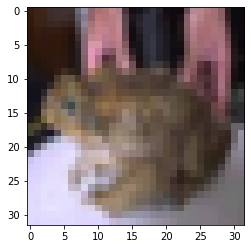

In [261]:
# WRITE CODE HERE
cf_train_imgs = []
cf_train_labels= []

s = unpickle("cifar-10-batches-py/data_batch_1")
b_imgs = []
b_labels  = np.array(s[b'labels'])
for j in range(10000):
    img = s[b'data'][j].reshape(3,32,32).transpose(1,2,0)/255
    b_imgs.append(img)
b_imgs = np.array(b_imgs)    
ind = list(range(10000))
np.random.shuffle(ind)
# print(ind[100])
train_imgs =b_imgs[ind[:100],:]
train_labels = b_labels[ind[:100]]

print(s[b'filenames'][ind[15]])
print(train_imgs.shape,train_labels.shape)
plt.imshow(train_imgs[15])
train_labels[15]

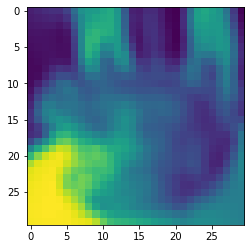

In [262]:
x= np.reshape([i*0.1 for i in range(784*3)],(28,28,3))
cl = Convolution_Layer(3,1,(3,3),stride=1,padding=0)
f = cl.forward(train_imgs[15])
plt.imshow(f)

(3, 3, 3)


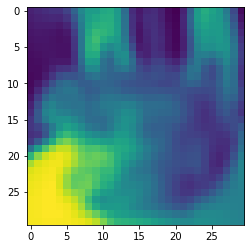

In [263]:
gaussian_blur = generate_gaussian_filter(2,(3,3,3))
print(gaussian_blur.shape)
cl.set_weights(gaussian_blur.reshape(1,3,3,3))

f = cl.forward(train_imgs[15])
plt.imshow(f)

### Generate output for the first 5 images of the training set

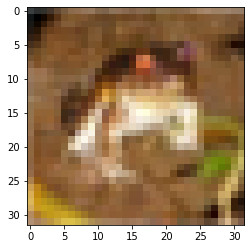

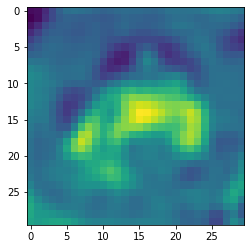

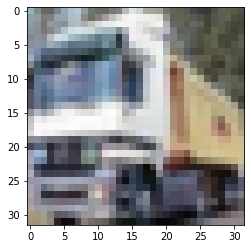

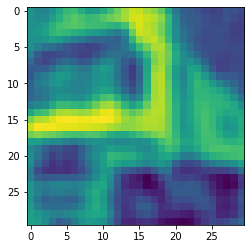

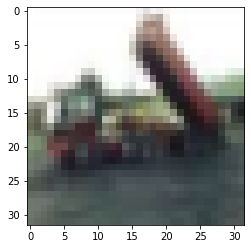

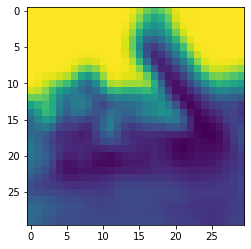

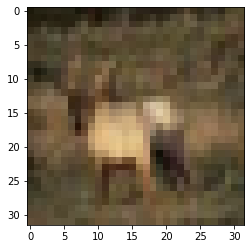

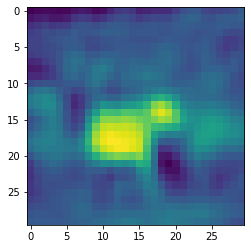

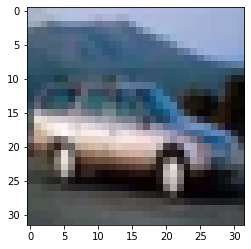

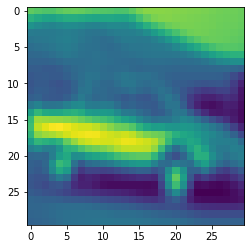

In [229]:
# WRITE CODE HERE
for i in range(5):
    image = s[b'data'][i].reshape(3,32,32).transpose(1,2,0)/255
    plt.imshow(image)
    plt.show()
    
    
    gaussian_blur=generate_gaussian_filter(2,(3,3,3))
    model = Convolution_Layer(3,1,(3,3),stride=1,padding=0)
    model.set_weights(gaussian_blur.reshape(1,3,3,3))
    out=model.forward(image)
    plt.imshow(out)
    plt.show()

### Use matplotlib to show the input and corresponding blurred output

In [ ]:
# WRITE CODE HERE

## Question 5
<br>
Now we will use this module for training a simple Convolution Layer using CIFAR-10 images. 

* The goal is to learn a set of weights, by using the backpropagation function created. To test the backpropagation, instead of training a whole network, we will train only a single layer.
  * Instantiate a Convolution  layer $C_0$ with 20 filters, each with size 5$\times$5 (RGB image, so 3 input channels). Load the given numpy array of size (20,3,5,5), which represents the weights of a convolution layer. Set the given values as the filter weights for $C_0$. Take 100 CIFAR-10 images. Save the output of these 100 images generated from this Convolution layer $C_0$. 
  
  * Now, initialize a new convolution layer $C$ with weight values sampled from uniform distribution [-1,1]. Use the $L_2$ loss between the output of this layer $C$ and the output generated in the previous step to learn the filter weights of $C_0$.


In [228]:
## Load filter weights from given numpy array "C0_weights.npy".
## Init a conv layer C_0 with these given weights

## For all images get output. Store in numpy array.

C0_weights = np.load("C0_weights.npy")
print(C0_weights.shape)
C0_weights = C0_weights.transpose(0,2,3,1)
print(C0_weights.shape)

C_0= Convolution_Layer(3,20,(5,5))
C_0.set_weights(C0_weights)
print(train_imgs[0].shape)
C0_out = []
for i in range(100):
    C0_out.append(C_0.forward(train_imgs[i]))
    

    
    
    


(20, 3, 5, 5)
(20, 5, 5, 3)
(32, 32, 3)


In [230]:
# for part 2 we need to write a class for the  L2 loss
class L2_loss():
    def ___init__(self):
        self.C0_output=None
        self.C_output=None
    def forward(self, C0_output,C_output):
        loss = np.linalg.norm(C0_output-C_output)/1000
#         print(loss.shape)
        self.f = (C0_output-C_output)/1000
        return loss
    
    def backward(self,output_grad=1):
        grad=2*(self.f)
        return grad
    
    

# Now Init a new conv layer C and a L2 loss layer


# Train the new conv-layer C using the L2 loss to learn C_0, i.e., the set of given weights.
# Use mini-batches if required


# Print L2 dist between output from the new trained convolution layer C and the outputs generated from C_0.


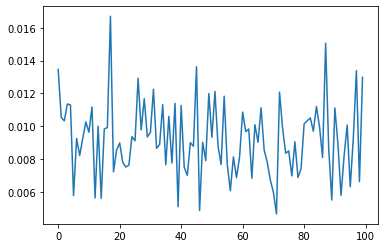

In [260]:
max_epochs=5
model = Convolution_Layer(3,20,(5,5),stride=1,padding=0)
L2=L2_loss()

LOSSES=[]
epochs=1
for epoch in range(epochs):
    min_loss=1000000000
    for i in range(train_imgs.shape[0]):
        ## forward ###
        C_output = model.forward(train_imgs[i])
        #print("--------out________")
        #print(C_output)
        loss = L2.forward(C0_output_imgs[i],C_output)/len(s[b'labels'])
        LOSSES.append(loss)
        
        ### backward ####
        loss_backward = L2.backward(loss)
        #print("---------l2 backward-----------")
        #print(loss_backward)
        model.backward(loss_backward)
        min_loss = min(min_loss,loss)
    
    
plt.plot(LOSSES)